In [1]:
import openmc 
import pandas as pd
import openmc.deplete as od
import math
%matplotlib inline
openmc.config['cross_sections'] = "/home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/cross_sections.xml"

## VOYGR model
The VOYGR modeled is simplified by using a PWR assembly model, specifically the [example model 
in OpenMC](https://docs.openmc.org/en/latest/pythonapi/generated/openmc.examples.pwr_assembly.html#openmc.examples.pwr_assembly).
The Fuel material is modified to be 4.09% weight fraction U-235, in a UO2 form. This modification 
matches the input fuel for the VOYGR used in the transition scenarios.

In [3]:
pwr_model = openmc.examples.pwr_assembly()

pwr_model.materials[0].nuclides.clear()
pwr_model.materials[0].add_nuclide("U235", 0.0404, 'ao')
pwr_model.materials[0].add_nuclide("U238", 0.9596, 'ao')
pwr_model.materials[0].add_nuclide("O16", 2, 'ao')
fuel = pwr_model.materials[0]

openmc.config['cross_sections'] = "/home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/cross_sections.xml"

In [5]:
voygr_cross_sections = od.MicroXS.from_model(pwr_model, 
                                       domain = fuel, 
                                       chain_file="./voygr/chain_casl_pwr.xml")

hwloc/linux: Ignoring PCI device with non-16bit domain.
Pass --enable-32bits-pci-domain to configure to support such devices
(warning: it would break the library ABI, don't enable unless really needed).
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                #########

 Reading In113 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/In113.h5
 Reading In115 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/In115.h5
 Reading Sb121 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Sb121.h5
 Reading Sb123 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Sb123.h5
 Reading Sb125 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Sb125.h5
 Reading Te127_m1 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Te127_m1.h5
 Reading Te129_m1 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Te129_m1.h5
 Reading Te132 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Te132.h5
 Reading I127 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/I127.h5
 Reading I128 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/I128.h5
 Reading I129 from
 /home/abachmann@anl.go

 Reading Gd154 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Gd154.h5
 Reading Gd155 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Gd155.h5
 Reading Gd156 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Gd156.h5
 Reading Gd157 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Gd157.h5
 Reading Gd158 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Gd158.h5
 Reading Gd159 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Gd159.h5
 Reading Gd160 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Gd160.h5
 Reading Tb159 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Tb159.h5
 Reading Tb160 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Tb160.h5
 Reading Tb161 from
 /home/abachmann@anl.gov/openmc-xs-data/endfb-viii.0-hdf5/neutron/Tb161.h5
 Reading Dy160 from
 /home/abachmann@anl.gov/openm

In [6]:
voygr_cross_sections.to_csv("voygr/micro_xs.csv")

In [7]:
voygr_cross_sections

,"(n,gamma)","(n,p)","(n,a)","(n,2n)","(n,3n)","(n,4n)",fission
nuclide,,,,,,,
B10,0.033834,0.003271,328.291549,0.000000,0.000000e+00,0.0,0.000000
B11,0.000473,0.000006,0.000063,0.000007,0.000000e+00,0.0,0.000000
O16,0.000046,0.000062,0.003478,0.000000,0.000000e+00,0.0,0.000000
Br81,1.468614,0.000087,0.000006,0.001682,0.000000e+00,0.0,0.000000
Kr82,6.227460,0.000054,0.000015,0.001259,0.000000e+00,0.0,0.000000
...,...,...,...,...,...,...,...
Cm242,3.754088,0.000000,0.000000,0.000534,2.615737e-07,0.0,1.331052
Cm243,14.051949,0.000000,0.000000,0.001443,1.882888e-06,0.0,85.430061
Cm244,17.816035,0.000000,0.000000,0.001191,9.476176e-06,0.0,0.939304


### Calculate Pu equivalence for MOX recipe

In [9]:
nu_235 = 2.4355
nu_238 = 2.819
nu_239 = 2.836

In [17]:
p_235 = nu_235*voygr_cross_sections.loc['U235']['fission'] - voygr_cross_sections.loc['U235']['(n,gamma)']
p_238 = nu_238*voygr_cross_sections.loc['U238']['fission'] - voygr_cross_sections.loc['U238']['(n,gamma)']
p_239 = nu_239*voygr_cross_sections.loc['Pu239']['fission'] - voygr_cross_sections.loc['Pu239']['(n,gamma)']

In [18]:
equivalence = (p_235-p_238)/(p_239-p_238)

In [21]:
Pu_enrich = 4.09/equivalence
Pu_enrich # weight fraction of the actinides

9.083466631774755

## Xe-100 model 

This data is based on the Serpent model of the Sanagmon200. Serpent generated the cross 
section data, which then was converted to the correct form for OpenMC

In [2]:
file = "./htgr-mr-full-core.inp_mdx0.m"
serpent_data = pd.read_csv(file, skiprows=1, skipfooter=2,delimiter=' ', usecols=[0,3,10], header=None)

/tmp/ipykernel_4146752/302349059.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  serpent_data = pd.read_csv(file, skiprows=1, skipfooter=2,delimiter=' ', usecols=[0,3,10], header=None)


In [3]:
openmc_data = pd.DataFrame(columns=['nuclide','(n,gamma)','(n,2n)','(n,p)','(n,a)','(n,3n)','(n,4n)','fission'])

In [4]:
for ii in range(0, 3318,6):
    zai = int(serpent_data.iloc[ii][0])
    Z= math.floor(zai/10000)
    A=math.floor((zai-Z*10000)/10)
    m = zai -(Z*10000 +A*10)
    nucname = openmc.data.gnds_name(Z,A,m)
    dictionary = {'nuclide':nucname, '(n,gamma)':serpent_data.iloc[ii][10],
                  '(n,2n)':serpent_data.iloc[ii+1][10],'(n,p)':serpent_data.iloc[ii+2][10],
                  '(n,a)':serpent_data.iloc[ii+3][10],'(n,3n)':serpent_data.iloc[ii+4][10],
                  '(n,4n)':0.0, 'fission':serpent_data.iloc[ii+5][10]}
    openmc_data.loc[len(openmc_data)] = dictionary
# append on last nuclide
openmc_data.loc[len(openmc_data)] = {'nuclide':'Es255', '(n,gamma)':0,
                  '(n,2n)':0,'(n,p)':0,
                  '(n,a)':serpent_data.iloc[ii+3][10],'(n,3n)':0,
                  '(n,4n)':0.0, 'fission':0}
openmc_data = openmc_data.set_index('nuclide')

In [5]:
openmc_data.to_csv("./xe-100/micro_xs.csv")

In [34]:
xe100_cross_sections = od.MicroXS.from_csv("./xe-100/micro_xs.csv")

### Calculate Pu equivalence for MOX

In [33]:
nu_235 = 2.4355
nu_238 = 2.819
nu_239 = 2.836

In [35]:
p_235 = nu_235*xe100_cross_sections.loc['U235']['fission'] - xe100_cross_sections.loc['U235']['(n,gamma)']
p_238 = nu_238*xe100_cross_sections.loc['U238']['fission'] - xe100_cross_sections.loc['U238']['(n,gamma)']
p_239 = nu_239*xe100_cross_sections.loc['Pu239']['fission'] - xe100_cross_sections.loc['Pu239']['(n,gamma)']

In [36]:
equivalence = (p_235-p_238)/(p_239-p_238)

In [37]:
Pu_enrich = 15.5/equivalence
Pu_enrich # weight fraction of the actinides

17.99848388689712

# Sodium Fast Reactor
SFR Model for use in transition scenarios with a closed fuel cycle. Starting the model from the
(sample SFR model from OpenMC)[https://nbviewer.org/github/mit-crpg/openmc-reactor-examples/blob/main/SFR.ipynb],
and adjusted with information from the PRISM reactor as available. 

Sources: 
* Brian S. Triplett, Eric P. Loewen & Brett J. Dooies (2012) PRISM: A Competitive Small Modular Sodium-Cooled Reactor, Nuclear Technology, 178:2, 186-200, DOI: 10.13182/NT178-186

In [2]:
# Materials definitions

u235 = openmc.Material(name='U235')
u235.add_nuclide('U235', 1.0)
u235.set_density('g/cm3', 10.0)

u238 = openmc.Material(name='U238')
u238.add_nuclide('U238', 1.0)
u238.set_density('g/cm3', 10.0)

pu238 = openmc.Material(name='Pu238')
pu238.add_nuclide('Pu238', 1.0)
pu238.set_density('g/cm3', 10.0)

pu239 = openmc.Material(name='U235')
pu239.add_nuclide('Pu239', 1.0)
pu239.set_density('g/cm3', 10.0)

pu240 = openmc.Material(name='Pu240')
pu240.add_nuclide('Pu240', 1.0)
pu240.set_density('g/cm3', 10.0)

pu241 = openmc.Material(name='Pu241')
pu241.add_nuclide('Pu241', 1.0)
pu241.set_density('g/cm3', 10.0)

pu242 = openmc.Material(name='Pu242')
pu242.add_nuclide('Pu242', 1.0)
pu242.set_density('g/cm3', 10.0)

am241 = openmc.Material(name='Am241')
am241.add_nuclide('Am241', 1.0)
am241.set_density('g/cm3', 10.0)

o16 = openmc.Material(name='O16')
o16.add_nuclide('O16', 1.0)
o16.set_density('g/cm3', 10.0)

sodium = openmc.Material(name='Na')
sodium.add_nuclide('Na23', 1.0)
sodium.set_density('g/cm3', 0.96)

cu63 = openmc.Material(name='Cu63')
cu63.set_density('g/cm3', 10.0)
cu63.add_nuclide('Cu63', 1.0)

Al2O3 = openmc.Material(name='Al2O3')
Al2O3.set_density('g/cm3', 10.0)
Al2O3.add_element('O', 3.0)
Al2O3.add_element('Al', 2.0)

In [3]:
# Material mixtures
inner = openmc.Material.mix_materials(
    [u235, u238, pu238, pu239, pu240, pu241, pu242, am241, o16],
    [0.0019, 0.7509, 0.0046, 0.0612, 0.0383, 0.0106, 0.0134, 0.001, 0.1181],
    'wo')
outer = openmc.Material.mix_materials(
    [u235, u238, pu238, pu239, pu240, pu241, pu242, am241, o16],
    [0.0018, 0.73, 0.0053, 0.0711, 0.0445, 0.0124, 0.0156, 0.0017, 0.1176],
    'wo')
clad = openmc.Material.mix_materials(
    [cu63,Al2O3], [0.997,0.003], 'wo')

In [4]:
# Instantiate a Materials collection and export to xml
materials_file = openmc.Materials([inner, outer, sodium, clad])
materials_file.export_to_xml()

In [5]:
# Geometry definitions

fuel_or = openmc.ZCylinder( r=0.943/2) 
clad_ir = openmc.ZCylinder( r=0.973/2) 
clad_or = openmc.ZCylinder( r=1.073/2) 

top = openmc.ZPlane( z0=+50, boundary_type='vacuum')
bottom = openmc.ZPlane( z0=-50, boundary_type='vacuum') 

fuel_region = -fuel_or & -top & +bottom
gap_region  = +fuel_or & -clad_ir  & -top & +bottom
clad_region = +clad_ir & -clad_or  & -top & +bottom
moderator_region = +clad_or & -top & +bottom
 
gap_cell = openmc.Cell( fill=inner, region=gap_region)
clad_cell = openmc.Cell( fill=clad, region=clad_region)
sodium_cell = openmc.Cell(fill=sodium, region=moderator_region)

In [6]:
inner_fuel_cell = openmc.Cell( fill=inner, region=fuel_region)
inner_u = openmc.Universe( cells=(inner_fuel_cell, gap_cell, clad_cell, sodium_cell))

In [7]:
outer_fuel_cell = openmc.Cell(fill=outer, region=fuel_region)
outer_u = openmc.Universe( cells=(outer_fuel_cell, gap_cell, clad_cell, sodium_cell))

In [8]:
# Creating filling for emtpy space in the core

sodium_mod_cell = openmc.Cell( fill=sodium)
sodium_mod_u = openmc.Universe(cells=(sodium_mod_cell,))

In [9]:
# Define a lattice for inner assemblies
in_lat = openmc.HexLattice( name='inner assembly')
in_lat.center = (0., 0.)
in_lat.pitch = [21.08/17]
in_lat.orientation = 'x'
in_lat.outer = sodium_mod_u

# Create rings of fuel universes that will fill the lattice
inone = [inner_u]*48 #36
intwo = [inner_u]*42 #28
inthree = [inner_u]*36 #21
infour = [inner_u]*30 #15
infive = [inner_u]*24 #10
insix = [inner_u]*18 #6
inseven = [inner_u]*12 #3
ineight = [inner_u]*6 #1
innine = [inner_u]*1
in_lat.universes = [inone,intwo,inthree,infour,infive,insix,inseven,ineight,innine]

# Create the prism that will contain the lattice
outer_in_surface = openmc.model.hexagonal_prism(edge_length=12.1705, orientation='x')

# Fill a cell with the lattice. This cell is filled with the lattice and contained within the prism.
main_in_assembly = openmc.Cell( fill=in_lat, region=outer_in_surface & -top & +bottom)

# Fill a cell with a material that will surround the lattice
out_in_assembly  = openmc.Cell( fill=sodium, region=~outer_in_surface & -top & +bottom)

# Create a universe that contains both 
main_in_u = openmc.Universe( cells=[main_in_assembly, out_in_assembly])

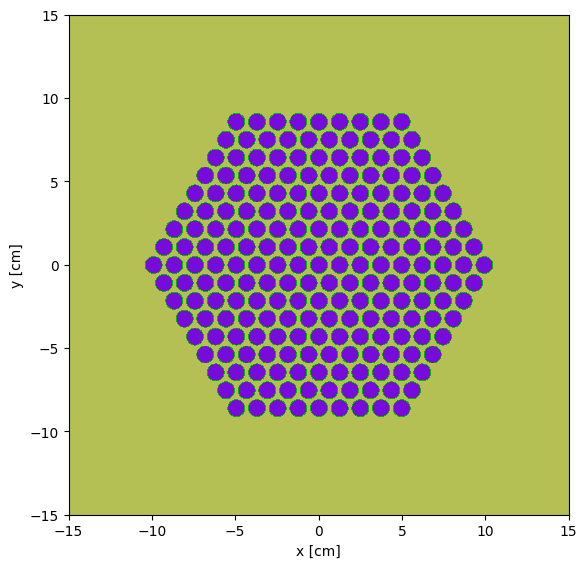

In [10]:
main_in_u.plot(origin = (0,0,0), pixels=(500, 500), width = (30.,30.), color_by = 'material')

In [11]:
# Define a lattice for outer assemblies
out_lat = openmc.HexLattice( name='outer assembly')
out_lat.center = (0., 0.)
out_lat.pitch = (21.08/17,)
out_lat.orientation = 'x'
out_lat.outer = sodium_mod_u

# Create rings of fuel universes that will fill the lattice
outone = [outer_u]*48
outtwo = [outer_u]*42
outthree = [outer_u]*36
outfour = [outer_u]*30
outfive = [outer_u]*24
outsix = [outer_u]*18
outseven = [outer_u]*12
outeight = [outer_u]*6
outnine = [outer_u]*1
out_lat.universes = [outone,outtwo,outthree,outfour,outfive,outsix,outseven,outeight,outnine]

# Create the prism that will contain the lattice
outer_out_surface = openmc.model.hexagonal_prism(edge_length=12.1705)

# Fill a cell with the lattice. This cell is filled with the lattice and contained within the prism.
main_out_assembly = openmc.Cell( fill=out_lat, region=outer_out_surface & -top & +bottom)

# Fill a cell with a material that will surround the lattice
out_out_assembly  = openmc.Cell( fill=sodium,  region=~outer_out_surface & -top & +bottom)

# Create a universe that contains both 
main_out_u = openmc.Universe( cells=[main_out_assembly, out_out_assembly])

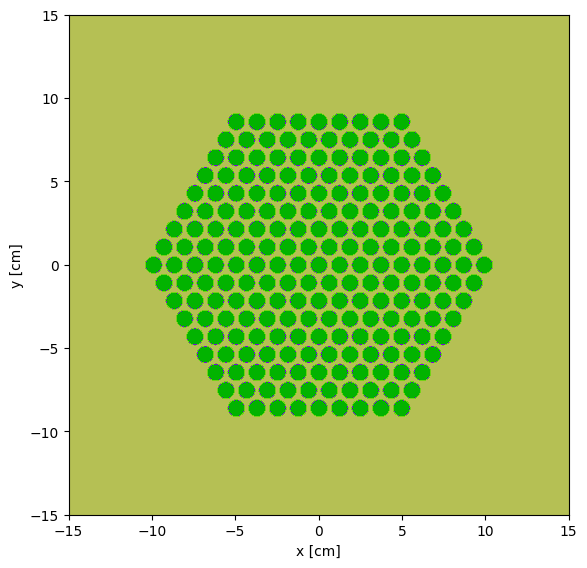

In [12]:
main_out_u.plot(origin = (0,0,0), pixels=(500, 500), width = (30.,30.), color_by = 'material')

In [13]:
# Create a hexagonal water cell -- can use for non-fuel assemblies

reflector_assembly = openmc.model.hexagonal_prism(edge_length=12.1705, orientation='x')
ref_cell = openmc.Cell(fill=sodium, region=reflector_assembly & -top & +bottom)
out_ref_cell  = openmc.Cell( fill=sodium, region=~reflector_assembly & -top & +bottom)
ref_u = openmc.Universe( cells=[ref_cell, out_ref_cell])

In [14]:
# Define the core lattice

core_lat = openmc.HexLattice( name='core')
core_lat.center = (0., 0.)
core_lat.pitch = (21.08,)
core_lat.outer = sodium_mod_u

In [15]:
# Create rings of fuel universes that will fill the lattice
ref_one = [ref_u] * 96
ref_two = [ref_u] * 90
ref_three = [ref_u] * 84
ref_four = ([ref_u] * 5 + [main_out_u] * 4 + [ref_u] * 4) * 6
ref_five = ([ref_u] + [main_out_u] * 11) * 6
out_one = [main_out_u]*66
out_two = [main_out_u]*60
out_three = ([main_out_u]*2 + [main_in_u]*6 + [main_out_u] * 1)*6
in_one = [main_in_u]*48
in_two = [main_in_u]*42
in_three = [main_in_u]*36
in_four = [main_in_u]*30
in_five = [main_in_u]*24
in_six = [main_in_u]*18
in_seven = [main_in_u]*12
in_eight = [main_in_u]*6
in_nine = [main_in_u]*1
core_lat.universes = [ref_one,ref_two,ref_three,ref_four,ref_five,out_one,out_two,out_three,in_one,in_two,in_three,in_four,in_five,in_six,in_seven,in_eight,in_nine]

In [16]:
# Create the prism that will contain the lattice
outer_core_surface = openmc.model.hexagonal_prism(edge_length=347.82, boundary_type='vacuum')

# Fill a cell with the lattice. This cell is filled with the lattice and contained within the prism.
core = openmc.Cell(fill=core_lat, region=outer_core_surface & -top & +bottom)

# Fill a cell with a material that will surround the lattice
out_core = openmc.Cell( fill=outer, region=~outer_core_surface & -top & +bottom)

# Create a universe that contains both 
main_u = openmc.Universe( cells=[core, out_core]) 

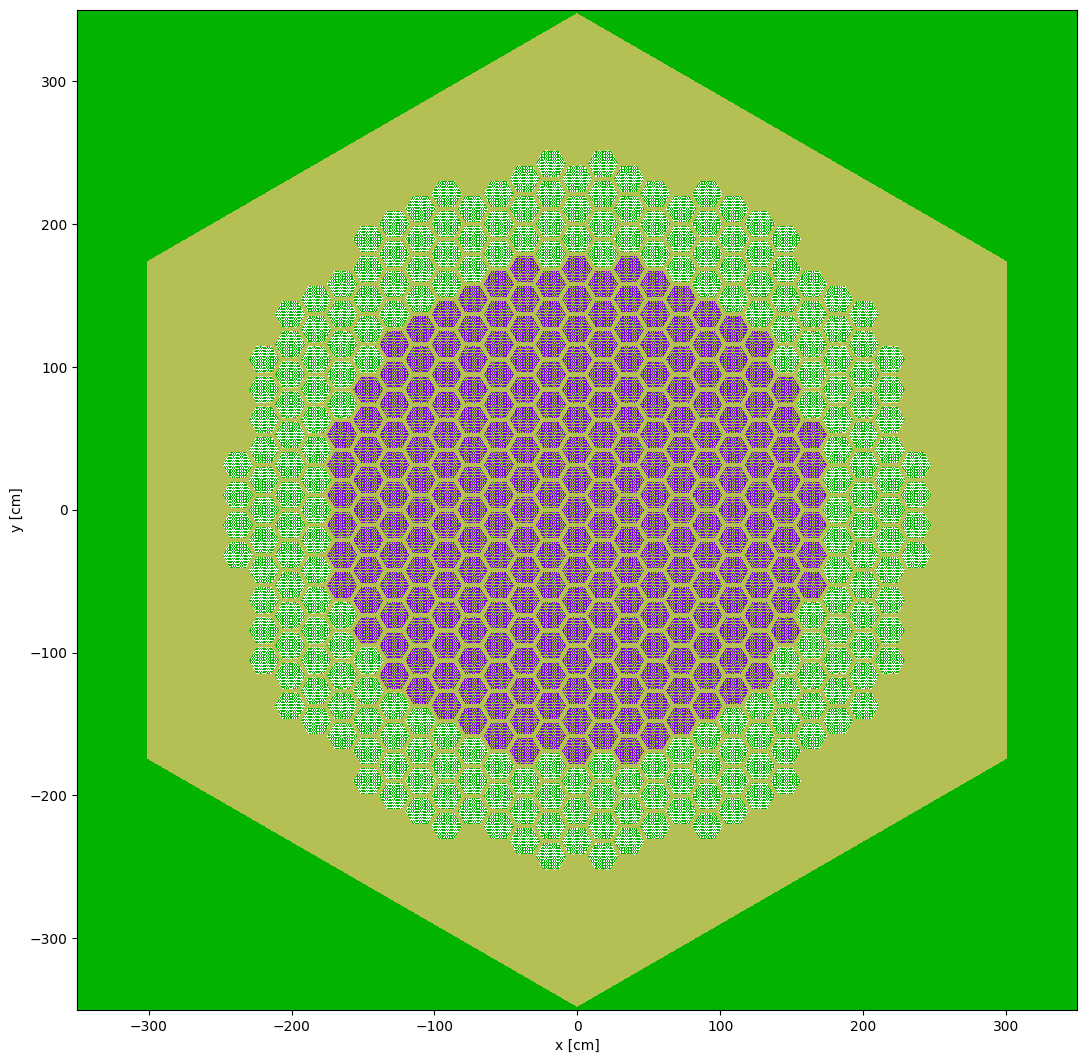

In [18]:
main_u.plot(origin = (0,0,0), pixels=(1000, 1000), width = (700.,700.), color_by = 'material')